In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

from athena import Experiments, ClassificationSolver, datasets
from athena.models import ResNet18
from athena.utils.functions import plot_experiments, plot_misclassified

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
batch_size = 128 if torch.cuda.is_available() else 64
epochs = 115

In [3]:
train_loader = datasets.cifar10(batch_size=batch_size, use_default_transforms=True)
test_loader = datasets.cifar10(train=False, batch_size=batch_size, use_default_transforms=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
exps = (
    Experiments("ResNet-18")
    .log_directory("./logs")
    .add("ResNet-18 with Cross Entropy Loss")
        .model(ResNet18())
        .solver(ClassificationSolver)
            .optimizer(optim.SGD, lr=0.1, momentum=0.9, weight_decay=5e-4)
            .scheduler(StepLR, step_size=100, gamma=0.1)
            .epochs(epochs)
            .train_loader(train_loader)
            .test_loader(test_loader)
            .loss_fn(F.cross_entropy)
            .device(device)
            .build()
        .build()
    .done()
)

In [5]:
exps.run()

=> Running experiment: ResNet-18 with Cross Entropy Loss
Epoch: 1 / 115
391/391 [==============================] - 62s 158ms/step - loss: 1.9614 - accuracy: 32.2520
Test set: Average loss: 1.5479, Accuracy: 4194/10000 (41.94%)

Epoch: 2 / 115
391/391 [==============================] - 62s 159ms/step - loss: 1.3905 - accuracy: 49.1160
Test set: Average loss: 1.3636, Accuracy: 4986/10000 (49.86%)

Epoch: 3 / 115
391/391 [==============================] - 62s 159ms/step - loss: 1.1357 - accuracy: 59.1740
Test set: Average loss: 1.2718, Accuracy: 5742/10000 (57.42%)

Epoch: 4 / 115
391/391 [==============================] - 62s 160ms/step - loss: 0.8849 - accuracy: 68.7060
Test set: Average loss: 0.9214, Accuracy: 6757/10000 (67.57%)

Epoch: 5 / 115
391/391 [==============================] - 63s 160ms/step - loss: 0.7068 - accuracy: 74.9640
Test set: Average loss: 0.8179, Accuracy: 7161/10000 (71.61%)

Epoch: 6 / 115
391/391 [==============================] - 63s 160ms/step - loss: 0.5814 

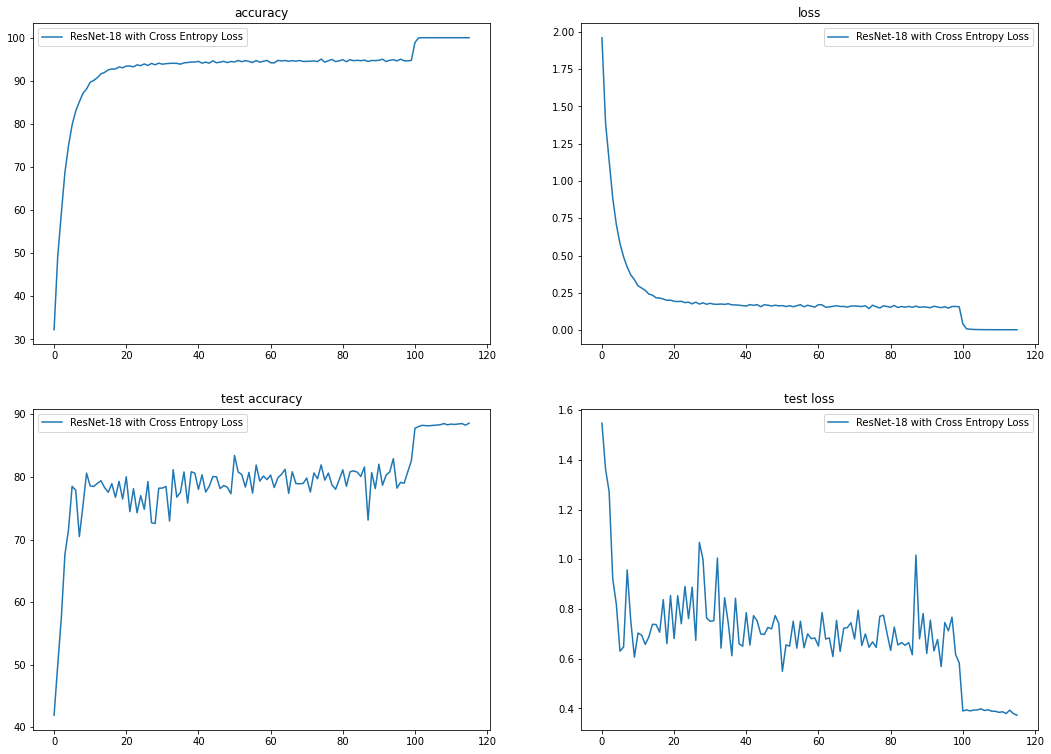

In [6]:
plot_experiments(exps)

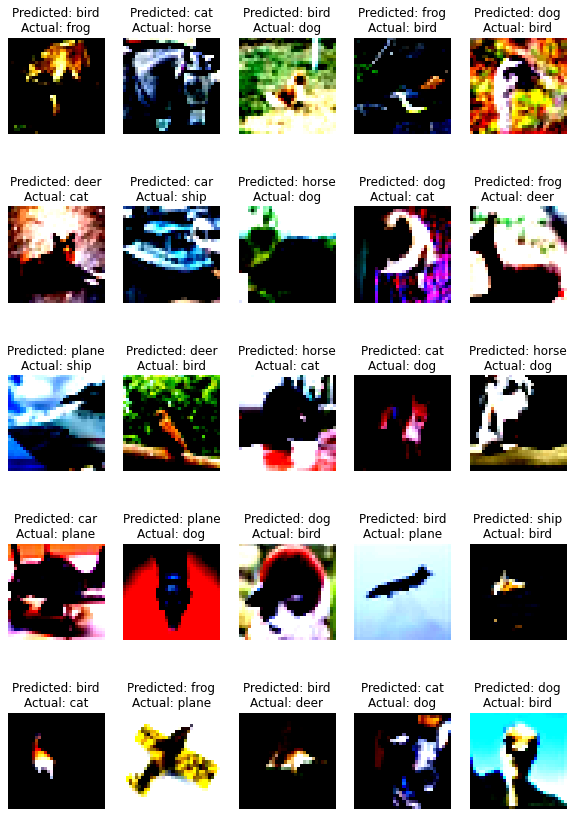

In [7]:
plot_misclassified(
    25,
    exps["ResNet-18 with Cross Entropy Loss"],
    data_loader=test_loader,
    device=device,
    class_labels=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
)